In [1]:
import matplotlib.pyplot as plt
import sqlite3
import sys
import os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from IPython.display import Markdown, display 

sys.path.append(os.path.abspath("../Queries"))
from query import Queries
%matplotlib inline


In [2]:
conn = sqlite3.connect('../safe-haven-detection.db')

query = Queries(conn)

# Note : this file contains different visualisations that draw important 
# insights from the cleaned data. Most of the explanation will be in MARKDOWN format along the graphs, 
# instead of comments.


### **Top 30 Counties with Highest Unemployment Rates**

#### **Purpose**
This visualization highlights the 30 counties with the highest unemployment rates for the year 2022.

#### **Why It Matters**
Unemployment is a key economic indicator that influences several aspects of community well-being, including crime, poverty, and access to resources. Identifying counties with the highest unemployment rates can help target efforts for job creation and economic development.

#### **How It’s Calculated**
The unemployment rates for 2022 were retrieved from the `unemployment` table, sorted in descending order, and the top 30 counties were selected.

#### **Observations**
- The bar chart below represents unemployment rates for the top 30 counties.
- Counties with higher unemployment rates may face greater socio-economic challenges.


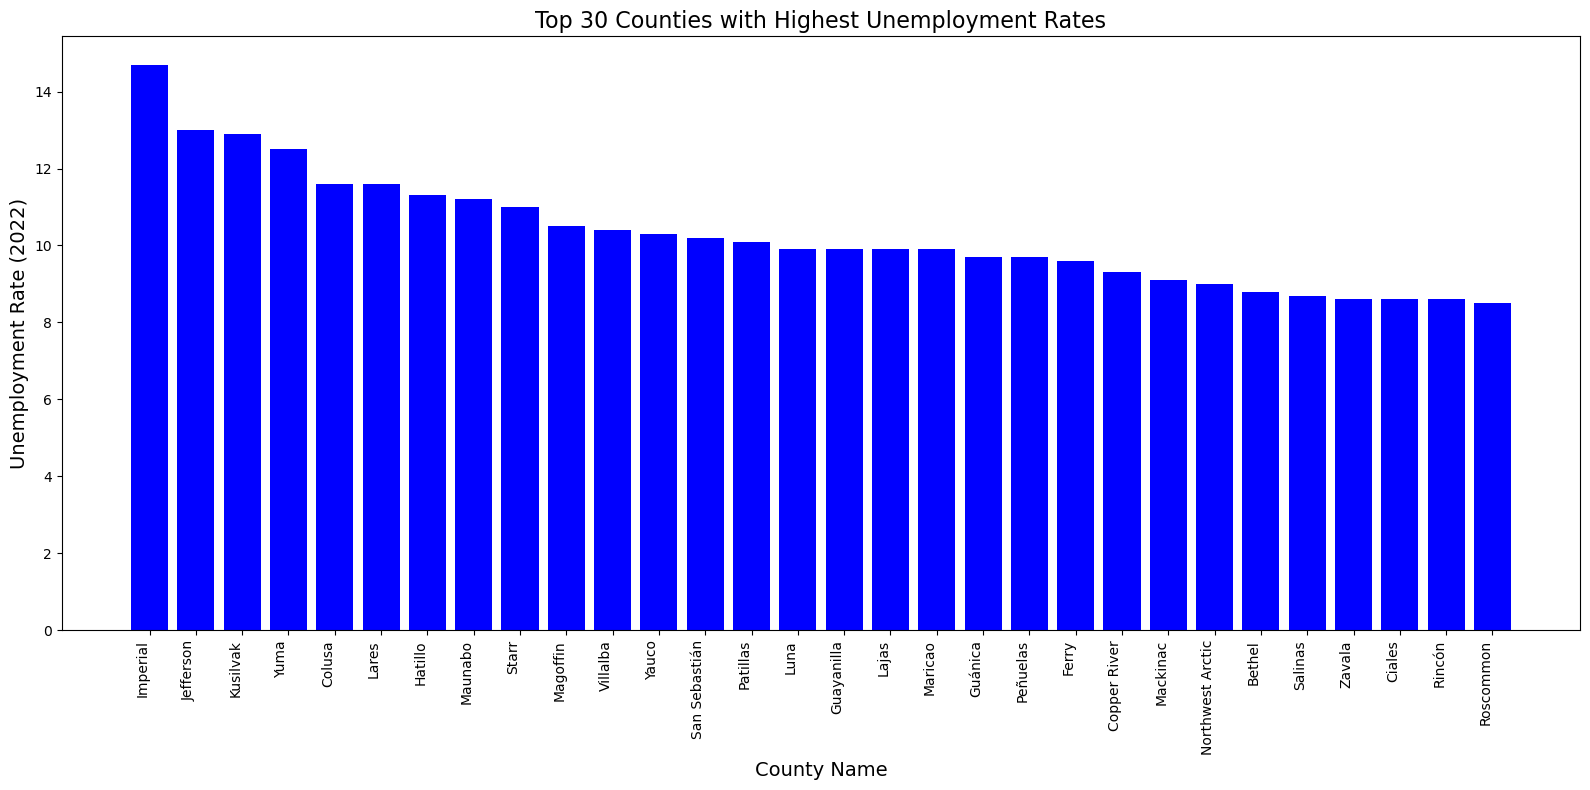

In [3]:

# Markdown Explanation
unemployment_markdown = """
### **Top 30 Counties with Highest Unemployment Rates**

#### **Purpose**
This visualization highlights the 30 counties with the highest unemployment rates for the year 2022.

#### **Why It Matters**
Unemployment is a key economic indicator that influences several aspects of community well-being, including crime, poverty, and access to resources. Identifying counties with the highest unemployment rates can help target efforts for job creation and economic development.

#### **How It’s Calculated**
The unemployment rates for 2022 were retrieved from the `unemployment` table, sorted in descending order, and the top 30 counties were selected.

#### **Observations**
- The bar chart below represents unemployment rates for the top 30 counties.
- Counties with higher unemployment rates may face greater socio-economic challenges.
"""

display(Markdown(unemployment_markdown))

# Fetching top 30 counties with highest unemployment rates
table_output_unemp, df_unemployment = query.get_highest_top_n_unemployment(30)

# Bar Graph for Unemployment Rates
plt.figure(figsize=(16, 8))
plt.bar(df_unemployment['county_name'], df_unemployment['unemployment_rate_2022'], color='blue')
plt.title('Top 30 Counties with Highest Unemployment Rates', fontsize=16)
plt.xlabel('County Name', fontsize=14)
plt.ylabel('Unemployment Rate (2022)', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()



### **Top 30 Counties with Highest Crime Rates**

#### **Purpose**
This visualization showcases the 30 counties with the highest crime rates, measured as crimes per 100,000 people.

#### **Why It Matters**
High crime rates indicate areas that may require enhanced law enforcement, community interventions, and resource allocation to ensure safety. Understanding where crime is most prevalent can guide decision-making.

#### **How It’s Calculated**
The crime rates were retrieved from the `crime` table, sorted in descending order, and the top 30 counties were selected for this visualization.

#### **Observations**
- The bar chart below displays the crime rates for the top 30 counties.
- Counties with high crime rates often face additional challenges such as economic disparity, low education levels, or high poverty rates.


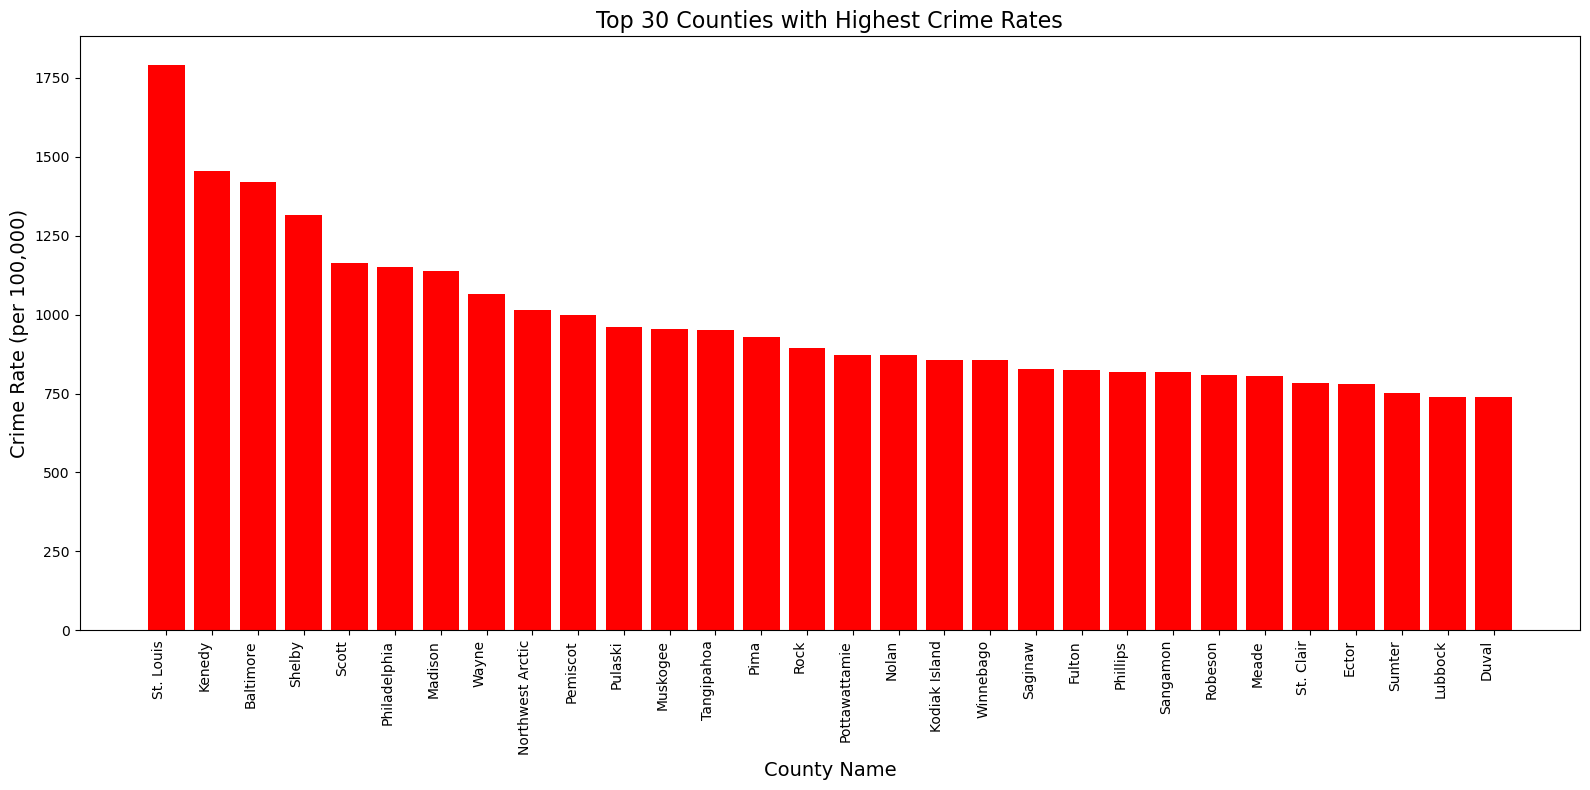

In [4]:
crime_markdown = """
### **Top 30 Counties with Highest Crime Rates**

#### **Purpose**
This visualization showcases the 30 counties with the highest crime rates, measured as crimes per 100,000 people.

#### **Why It Matters**
High crime rates indicate areas that may require enhanced law enforcement, community interventions, and resource allocation to ensure safety. Understanding where crime is most prevalent can guide decision-making.

#### **How It’s Calculated**
The crime rates were retrieved from the `crime` table, sorted in descending order, and the top 30 counties were selected for this visualization.

#### **Observations**
- The bar chart below displays the crime rates for the top 30 counties.
- Counties with high crime rates often face additional challenges such as economic disparity, low education levels, or high poverty rates.
"""

display(Markdown(crime_markdown))

# Fetching top 30 counties with highest crime rates
table_output_crime, df_crime = query.get_highest_top_n_crime_rate(30)

# Bar Graph for Crime Rates
plt.figure(figsize=(16, 8))
plt.bar(df_crime['county_name'], df_crime['crime_rate_per_100000'], color='red')
plt.title('Top 30 Counties with Highest Crime Rates', fontsize=16)
plt.xlabel('County Name', fontsize=14)
plt.ylabel('Crime Rate (per 100,000)', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


### **Top 30 Counties with Highest Poverty Percentages**

#### **Purpose**
This visualization highlights the 30 counties with the highest poverty percentages.

#### **Why It Matters**
High poverty levels can indicate areas that may require targeted social and economic interventions, including job creation programs, educational opportunities, and healthcare access.

#### **How It’s Calculated**
Poverty percentages were retrieved from the `poverty` table, sorted in descending order, and the top 30 counties were selected for this visualization.

#### **Observations**
- The bar chart below displays poverty levels for the top 30 counties.
- High poverty percentages often correlate with other socio-economic challenges, such as unemployment and crime.


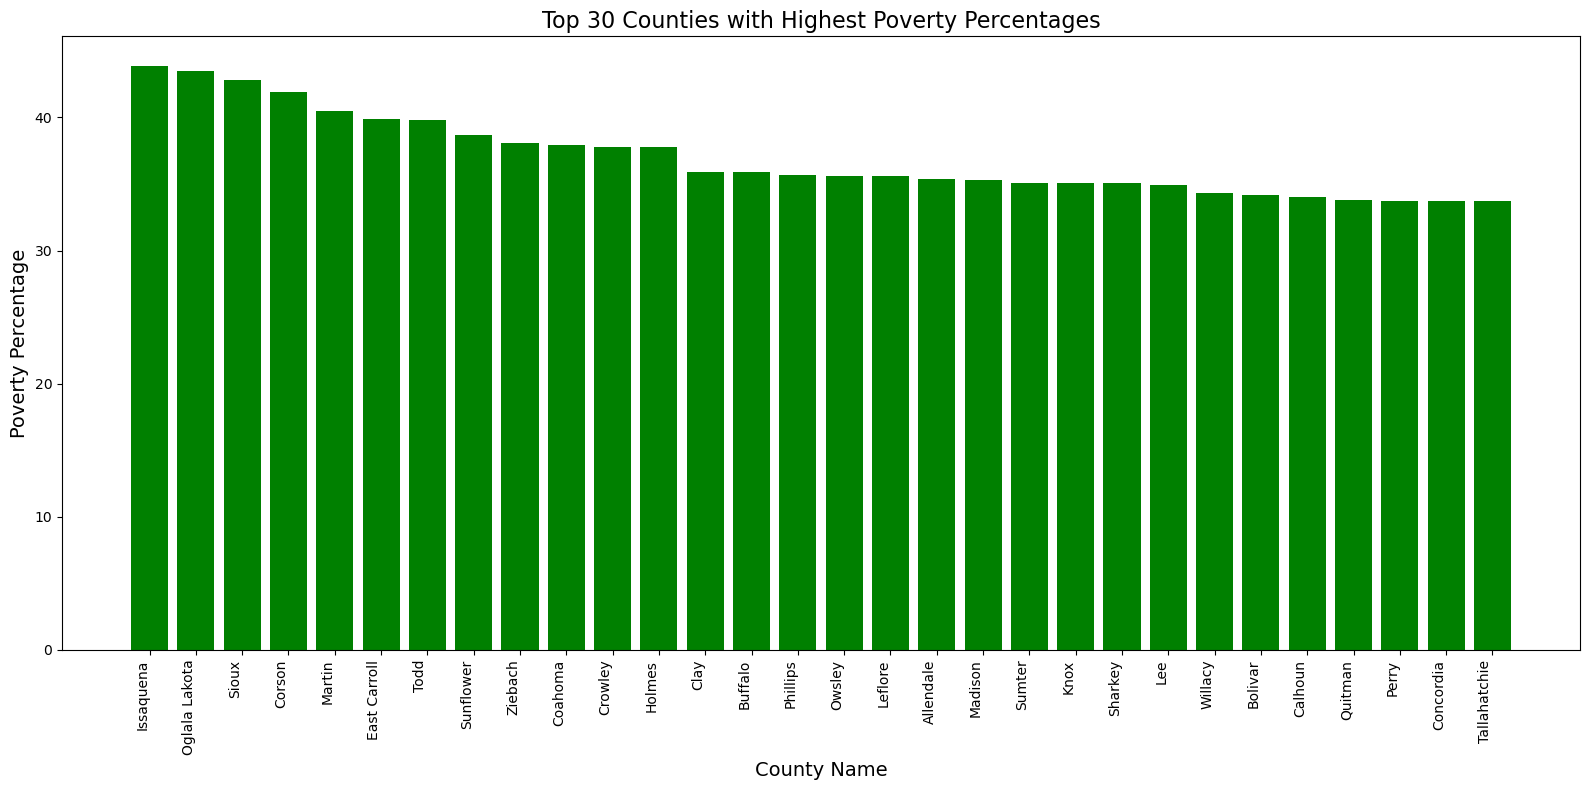

In [5]:
poverty_markdown = """
### **Top 30 Counties with Highest Poverty Percentages**

#### **Purpose**
This visualization highlights the 30 counties with the highest poverty percentages.

#### **Why It Matters**
High poverty levels can indicate areas that may require targeted social and economic interventions, including job creation programs, educational opportunities, and healthcare access.

#### **How It’s Calculated**
Poverty percentages were retrieved from the `poverty` table, sorted in descending order, and the top 30 counties were selected for this visualization.

#### **Observations**
- The bar chart below displays poverty levels for the top 30 counties.
- High poverty percentages often correlate with other socio-economic challenges, such as unemployment and crime.
"""

display(Markdown(poverty_markdown))

# Fetching top 30 counties with highest poverty percentages
table_output_pov, df_poverty = query.get_highest_top_n_poverty(30)

# Bar Graph for Poverty Levels
plt.figure(figsize=(16, 8))
plt.bar(df_poverty['county_name'], df_poverty['poverty_percentage'], color='green')
plt.title('Top 30 Counties with Highest Poverty Percentages', fontsize=16)
plt.xlabel('County Name', fontsize=14)
plt.ylabel('Poverty Percentage', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


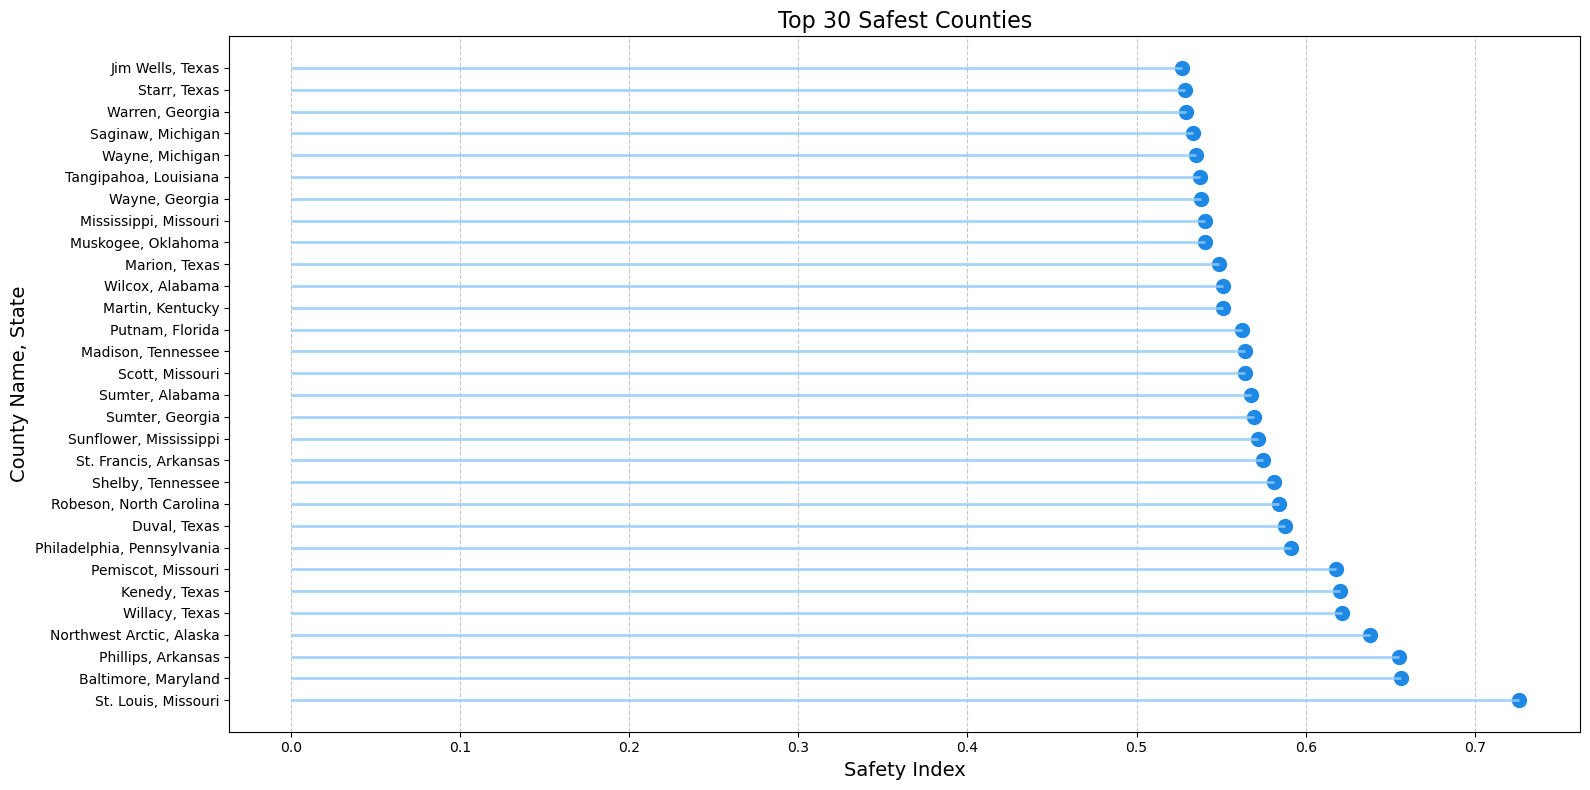


### Top 30 Safest Counties

This visualization highlights the **safest counties** based on a composite Safety Index. 

#### Why It Matters:
Understanding the safest counties can help identify best practices in public safety, economic stability, and resource management. These regions often have:
- Low crime rates.
- High availability of emergency services.
- Lower poverty and unemployment levels.
- Better education access.

#### How It’s Calculated:
The Safety Index is calculated as a weighted average of:
1. **Crime Rate**: Lower crime rates increase the safety score.
2. **Poverty Levels**: Lower poverty percentages positively impact safety.
3. **Education**: Higher education levels contribute to a safer environment.
4. **Unemployment**: Lower unemployment rates improve safety.
5. **Emergency Services**: High availability of hospitals and fire services boosts safety.

This plot ranks the top 30 counties with the highest Safety Index, showcasing regions excelling in safety metrics.


In [6]:
# Analysis of Safety Index in Counties
# 
# This visualization identifies the safest and most at-risk counties based on a composite Safety Index. 
# The Safety Index is calculated using factors such as crime rates, poverty levels, education rates, 
# unemployment rates, and emergency service availability. It provides an overview of regions that
# are performing well in terms of safety and those needing improvement.

# Fetch safety data
safety_df = query.get_safety_data()

# Top 30 Safest Counties (Highest Safety Index)
# These are the counties with the highest calculated safety index values, indicating high safety levels.
top_safe = safety_df.sort_values(by='safety_index', ascending=False).head(30).copy()

top_safe['county_label'] = top_safe['county_name'] + ", " + top_safe['state_name']

# Visualization for the Top 30 Safest Counties
plt.figure(figsize=(16, 8))
plt.hlines(y=top_safe['county_label'], xmin=0, xmax=top_safe['safety_index'], color='#90CAF9', alpha=0.8, linewidth=2)
plt.scatter(top_safe['safety_index'], top_safe['county_label'], color='#1E88E5', s=100, label='Safety Index')
plt.title('Top 30 Safest Counties', fontsize=16)
plt.xlabel('Safety Index', fontsize=14)
plt.ylabel('County Name, State', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


summary_markdown = """
### Top 30 Safest Counties

This visualization highlights the **safest counties** based on a composite Safety Index. 

#### Why It Matters:
Understanding the safest counties can help identify best practices in public safety, economic stability, and resource management. These regions often have:
- Low crime rates.
- High availability of emergency services.
- Lower poverty and unemployment levels.
- Better education access.

#### How It’s Calculated:
The Safety Index is calculated as a weighted average of:
1. **Crime Rate**: Lower crime rates increase the safety score.
2. **Poverty Levels**: Lower poverty percentages positively impact safety.
3. **Education**: Higher education levels contribute to a safer environment.
4. **Unemployment**: Lower unemployment rates improve safety.
5. **Emergency Services**: High availability of hospitals and fire services boosts safety.

This plot ranks the top 30 counties with the highest Safety Index, showcasing regions excelling in safety metrics.
"""

display(Markdown(summary_markdown))


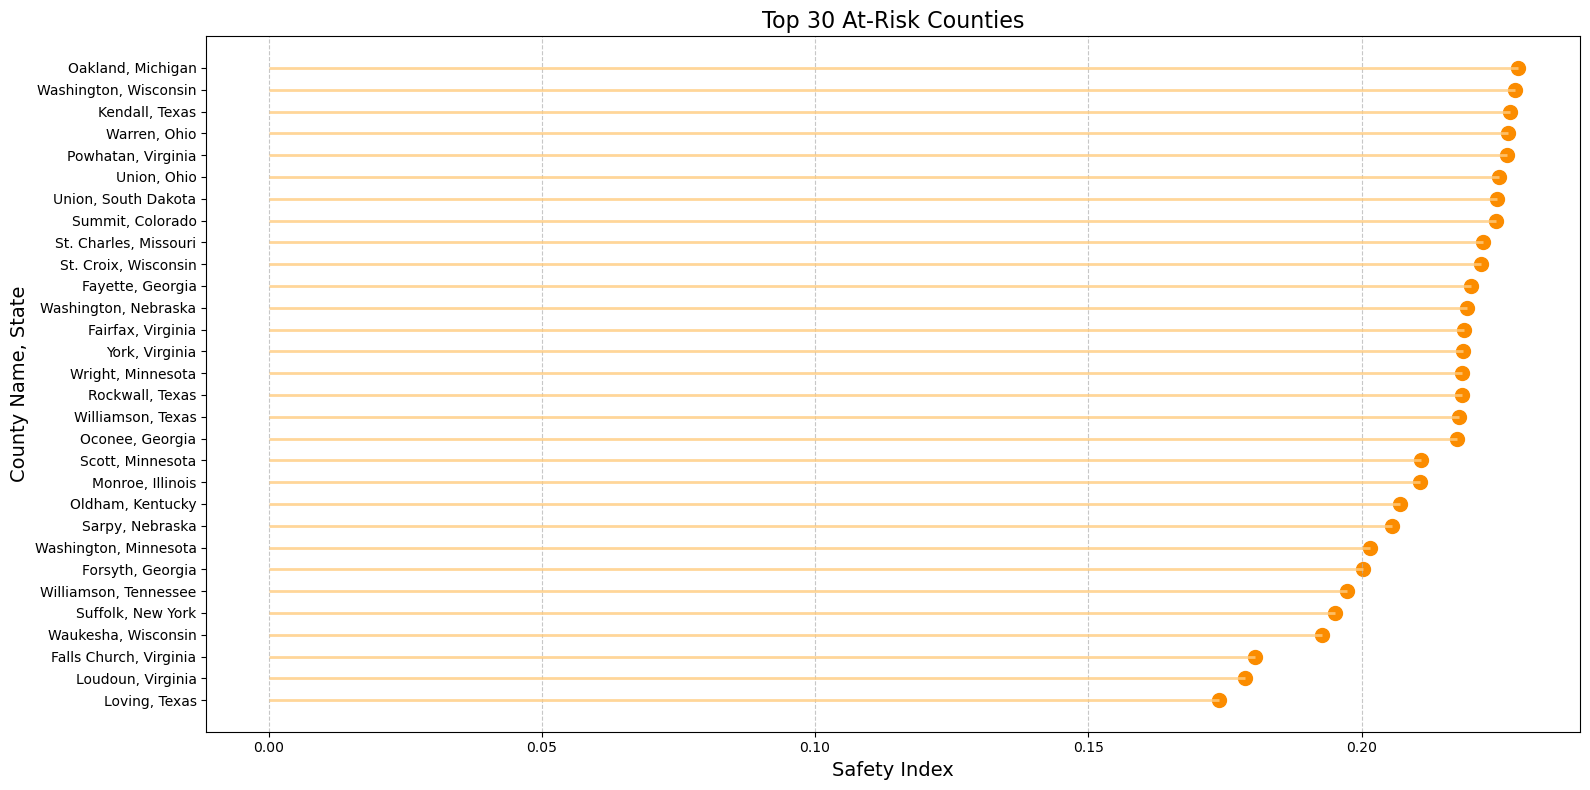


### Top 30 At-Risk Counties

This visualization identifies the **most at-risk counties** based on their Safety Index.

#### Why It Matters:
Understanding at-risk counties is crucial for policymakers, resource planners, and local governments. It highlights regions requiring targeted interventions to improve safety and public well-being. Common challenges in these counties include:
- High crime rates.
- High poverty and unemployment levels.
- Poor access to education.
- Limited emergency services.

#### How It’s Calculated:
The Safety Index considers the same metrics as the safest counties but highlights the regions with the **lowest safety index scores**. These are the areas that might need more investment in safety, education, and resource availability.

This plot ranks the top 30 counties with the lowest Safety Index, providing a roadmap for addressing regional challenges.


In [7]:
# Top 30 At-Risk Counties (Lowest Safety Index)
# These are the counties with the lowest safety index values, indicating areas most at-risk.
top_risk = safety_df.sort_values(by='safety_index', ascending=True).head(30).copy()

top_risk['county_label'] = top_risk['county_name'] + ", " + top_risk['state_name']

plt.figure(figsize=(16, 8))
plt.hlines(y=top_risk['county_label'], xmin=0, xmax=top_risk['safety_index'], color='#FFCC80', alpha=0.8, linewidth=2)
plt.scatter(top_risk['safety_index'], top_risk['county_label'], color='#FB8C00', s=100, label='Safety Index')
plt.title('Top 30 At-Risk Counties', fontsize=16)
plt.xlabel('Safety Index', fontsize=14)
plt.ylabel('County Name, State', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

summary_markdown_risk = """
### Top 30 At-Risk Counties

This visualization identifies the **most at-risk counties** based on their Safety Index.

#### Why It Matters:
Understanding at-risk counties is crucial for policymakers, resource planners, and local governments. It highlights regions requiring targeted interventions to improve safety and public well-being. Common challenges in these counties include:
- High crime rates.
- High poverty and unemployment levels.
- Poor access to education.
- Limited emergency services.

#### How It’s Calculated:
The Safety Index considers the same metrics as the safest counties but highlights the regions with the **lowest safety index scores**. These are the areas that might need more investment in safety, education, and resource availability.

This plot ranks the top 30 counties with the lowest Safety Index, providing a roadmap for addressing regional challenges.
"""

display(Markdown(summary_markdown_risk))


### Crime Types Distribution (Donut Chart)

This visualization uses a **donut chart** to show the breakdown of different crime types (murder, rape, robbery, and burglary) across all counties.

#### Why It Matters:
Understanding the distribution of specific crime types helps focus resources and strategies for reducing prevalent crimes.

#### How It’s Calculated:
The data is aggregated from the `crime` table, summing up incidents for each crime type across all counties.

- **Murder**: Total count of murders.
- **Rape**: Total count of rape cases.
- **Robbery**: Total count of robberies.
- **Burglary**: Total count of burglaries.

#### Visualization:
1. **Donut Chart**: Displays both the proportions and absolute numbers for each crime type.


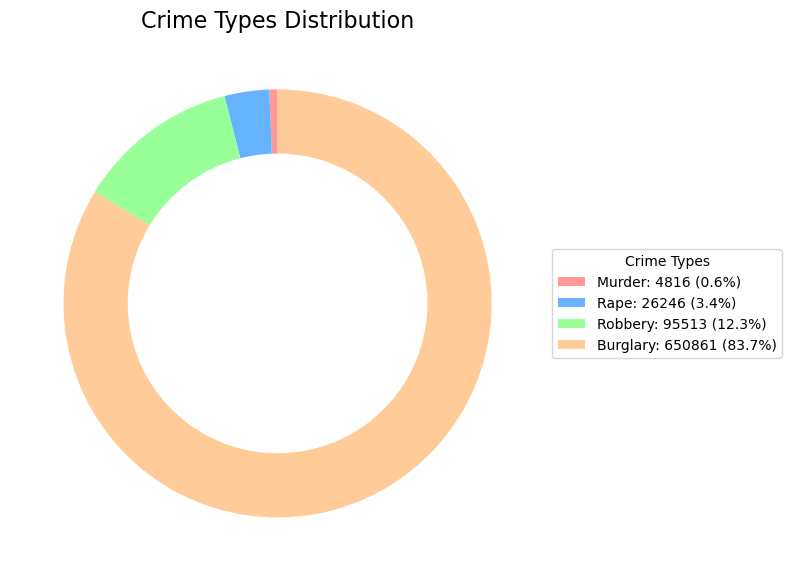

In [8]:
# Markdown 
crime_distribution_markdown = """
### Crime Types Distribution (Donut Chart)

This visualization uses a **donut chart** to show the breakdown of different crime types (murder, rape, robbery, and burglary) across all counties.

#### Why It Matters:
Understanding the distribution of specific crime types helps focus resources and strategies for reducing prevalent crimes.

#### How It’s Calculated:
The data is aggregated from the `crime` table, summing up incidents for each crime type across all counties.

- **Murder**: Total count of murders.
- **Rape**: Total count of rape cases.
- **Robbery**: Total count of robberies.
- **Burglary**: Total count of burglaries.

#### Visualization:
1. **Donut Chart**: Displays both the proportions and absolute numbers for each crime type.
"""

display(Markdown(crime_distribution_markdown))

#Getting the data
crime_data = query.get_crime_types_distribution()  

#Labels for crime types
crime_labels = ['Murder', 'Rape', 'Robbery', 'Burglary']
crime_values = [
    crime_data['total_murder'],
    crime_data['total_rape'],
    crime_data['total_robbery'],
    crime_data['total_burglary']
]

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts = ax.pie(
    crime_values,
    labels=None, 
    autopct=None,  
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.3) 
)

total = sum(crime_values)
legend_labels = [
    f"{label}: {value} ({value / total * 100:.1f}%)"
    for label, value in zip(crime_labels, crime_values)
]
ax.legend(
    wedges,
    legend_labels,
    title="Crime Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

#Setting label
plt.title("Crime Types Distribution", fontsize=16)

plt.tight_layout()
plt.show()



### Population Growth and Safety Analysis

This visualization combines the **percentage growth** and **absolute growth** of population for the top counties with the highest growth rates. 

#### Why It Matters:
Understanding how rapid population growth correlates with safety metrics is crucial for:
- Proactive resource allocation.
- Identifying counties that may face safety challenges due to growth.

#### How It’s Calculated:
- **Population Growth (%)**: Calculated as a percentage change between 2020 and 2023.
- **Absolute Population Growth**: The difference in total population between 2020 and 2023.

#### Visualization:
- **Dual-Axis Chart**: Shows both percentage and absolute growth for top 10 counties.


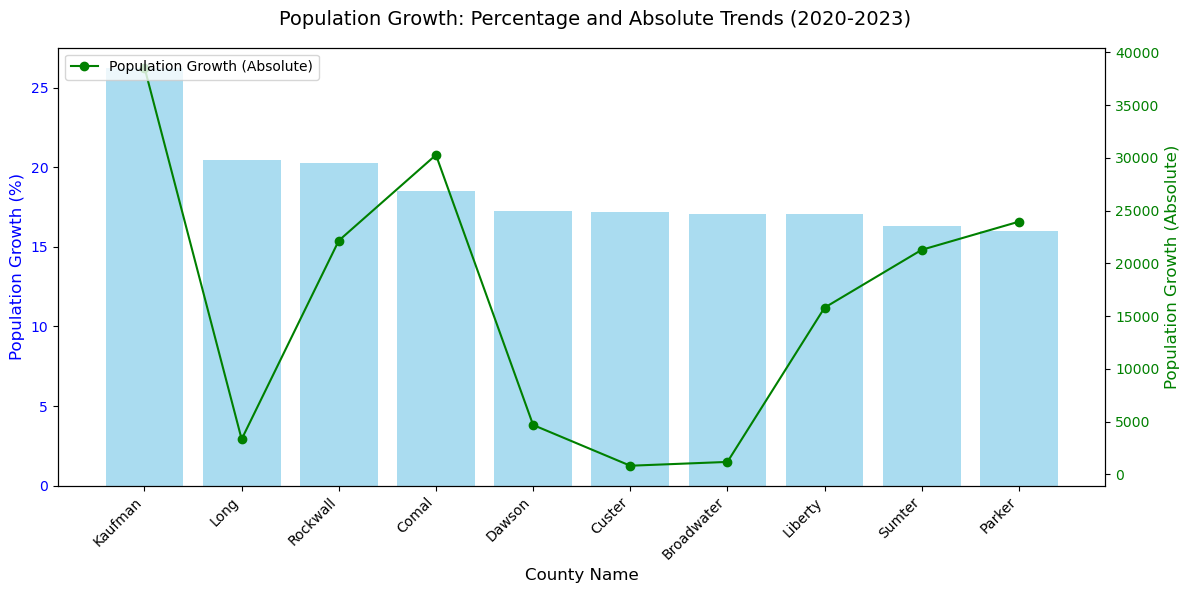

In [9]:
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

growth_and_safety_markdown = """
### Population Growth and Safety Analysis

This visualization combines the **percentage growth** and **absolute growth** of population for the top counties with the highest growth rates. 

#### Why It Matters:
Understanding how rapid population growth correlates with safety metrics is crucial for:
- Proactive resource allocation.
- Identifying counties that may face safety challenges due to growth.

#### How It’s Calculated:
- **Population Growth (%)**: Calculated as a percentage change between 2020 and 2023.
- **Absolute Population Growth**: The difference in total population between 2020 and 2023.

#### Visualization:
- **Dual-Axis Chart**: Shows both percentage and absolute growth for top 10 counties.
"""

display(Markdown(growth_and_safety_markdown))

growth_data = query.get_counties_with_highest_pop_growth(10, "2020", "2023")  
_, growth_df = growth_data  

fig, ax1 = plt.subplots(figsize=(12, 6))

# Population Growth Percentage
ax1.bar(growth_df["county_name"], growth_df["growth_percentage"], color="skyblue", alpha=0.7, label="Population Growth (%)")
ax1.set_ylabel("Population Growth (%)", fontsize=12, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xlabel("County Name", fontsize=12)
ax1.set_xticks(range(len(growth_df["county_name"])))
ax1.set_xticklabels(growth_df["county_name"], rotation=45, ha="right")

# Twin Axis for Absolute Growth
ax2 = ax1.twinx()
ax2.plot(growth_df["county_name"], growth_df["growth"], color="green", marker="o", label="Population Growth (Absolute)")
ax2.set_ylabel("Population Growth (Absolute)", fontsize=12, color="green")
ax2.tick_params(axis="y", labelcolor="green")

fig.suptitle("Population Growth: Percentage and Absolute Trends (2020-2023)", fontsize=14)
fig.tight_layout()
plt.legend(loc="upper left")
plt.show()



### County-Level Crime Distribution

This visualization highlights the **distribution of crime types** (murder, rape, robbery, burglary) across counties.

#### Purpose:
Understand which counties contribute most to specific crime types. This helps identify areas where targeted law enforcement or intervention programs might be required.

#### How It’s Calculated:
The data is aggregated from the `crime` table, summing up incidents for each crime type across counties. The top counties are shown for:
- **Murder**: Total count of murders.
- **Rape**: Total count of rape cases.
- **Robbery**: Total count of robberies.
- **Burglary**: Total count of burglaries.

#### Visualization:
1. **Horizontal Bar Chart**: Displays crime counts for each type across the top counties contributing to those crimes.


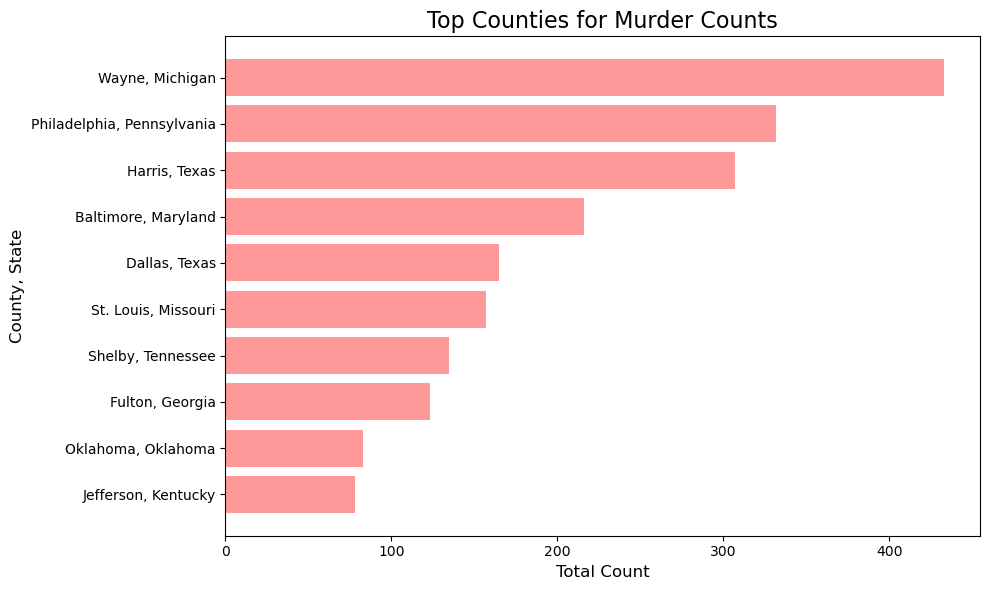

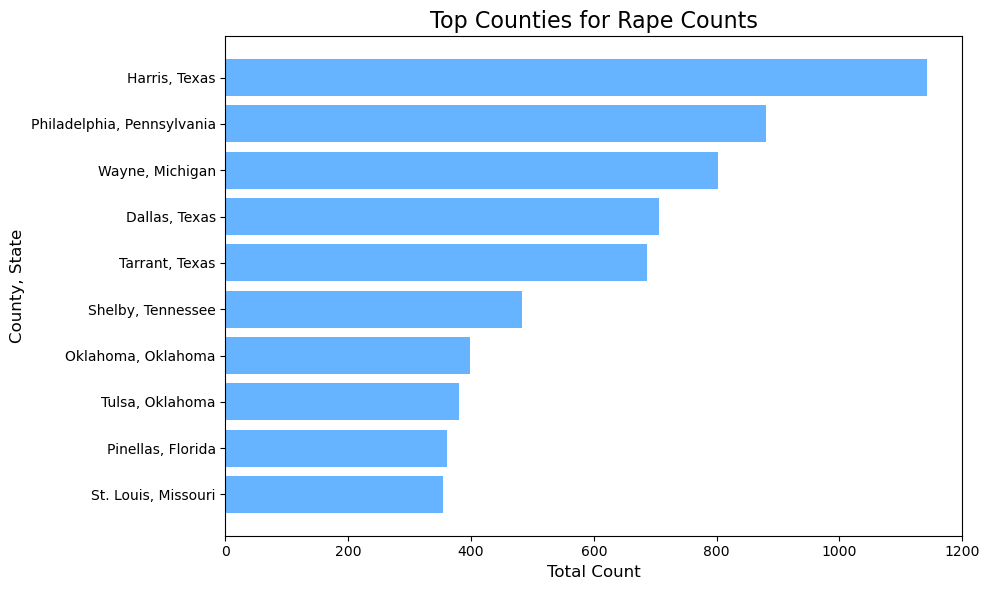

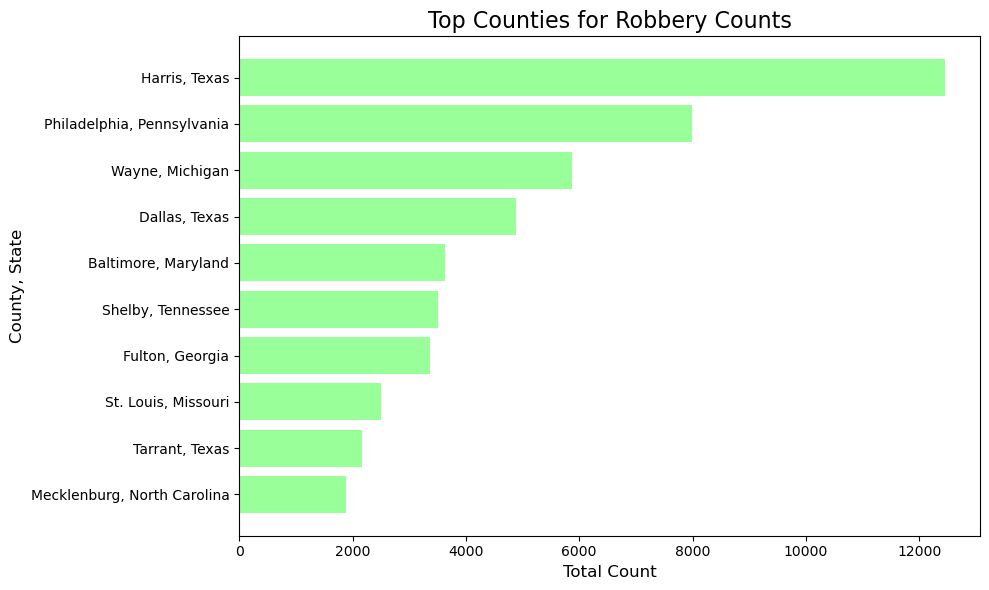

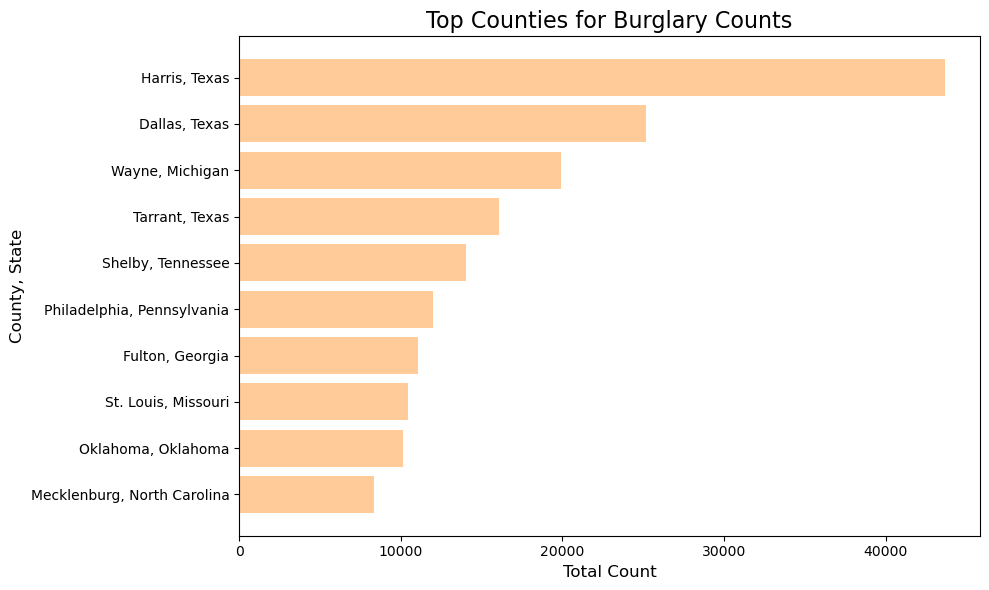

In [10]:
from IPython.display import Markdown, display

crime_county_distribution_markdown = """
### County-Level Crime Distribution

This visualization highlights the **distribution of crime types** (murder, rape, robbery, burglary) across counties.

#### Purpose:
Understand which counties contribute most to specific crime types. This helps identify areas where targeted law enforcement or intervention programs might be required.

#### How It’s Calculated:
The data is aggregated from the `crime` table, summing up incidents for each crime type across counties. The top counties are shown for:
- **Murder**: Total count of murders.
- **Rape**: Total count of rape cases.
- **Robbery**: Total count of robberies.
- **Burglary**: Total count of burglaries.

#### Visualization:
1. **Horizontal Bar Chart**: Displays crime counts for each type across the top counties contributing to those crimes.
"""
display(Markdown(crime_county_distribution_markdown))

crime_colors = {
    "murder": "#FF9999",  
    "rape": "#66B3FF",  
    "robbery": "#99FF99", 
    "burglary": "#FFCC99"  
}

crime_types = ["murder", "rape", "robbery", "burglary"]
crime_data = {}

for crime in crime_types:
    crime_data[crime] = query.get_top_crime_counties(crime)

for crime, data in crime_data.items():
    plt.figure(figsize=(10, 6))
    data = data.sort_values(by='total_count', ascending=True)
    plt.barh(
        data['county_name'] + ", " + data['state_name'], 
        data['total_count'], 
        color=crime_colors[crime]
    )
    plt.title(f"Top Counties for {crime.capitalize()} Counts", fontsize=16)
    plt.xlabel("Total Count", fontsize=12)
    plt.ylabel("County, State", fontsize=12)
    plt.tight_layout()
    plt.show()



### Hospitals in High Crime Areas with Crime Rates

This visualization highlights counties with high crime rates and the availability of hospitals in those regions, alongside the corresponding crime rates.

#### Why It Matters:
- Identifies areas with high crime rates that may need more healthcare infrastructure.
- Enables better resource planning and public safety strategies by correlating hospital availability with crime rates.

#### How It’s Calculated:
- The query retrieves counties where the crime rate exceeds a specified threshold, along with the details of hospitals in those areas and their corresponding crime rates.

#### Visualization:
- **Horizontal Bar Chart**: Displays the number of hospitals available in counties with high crime rates, with annotations showing the crime rate.


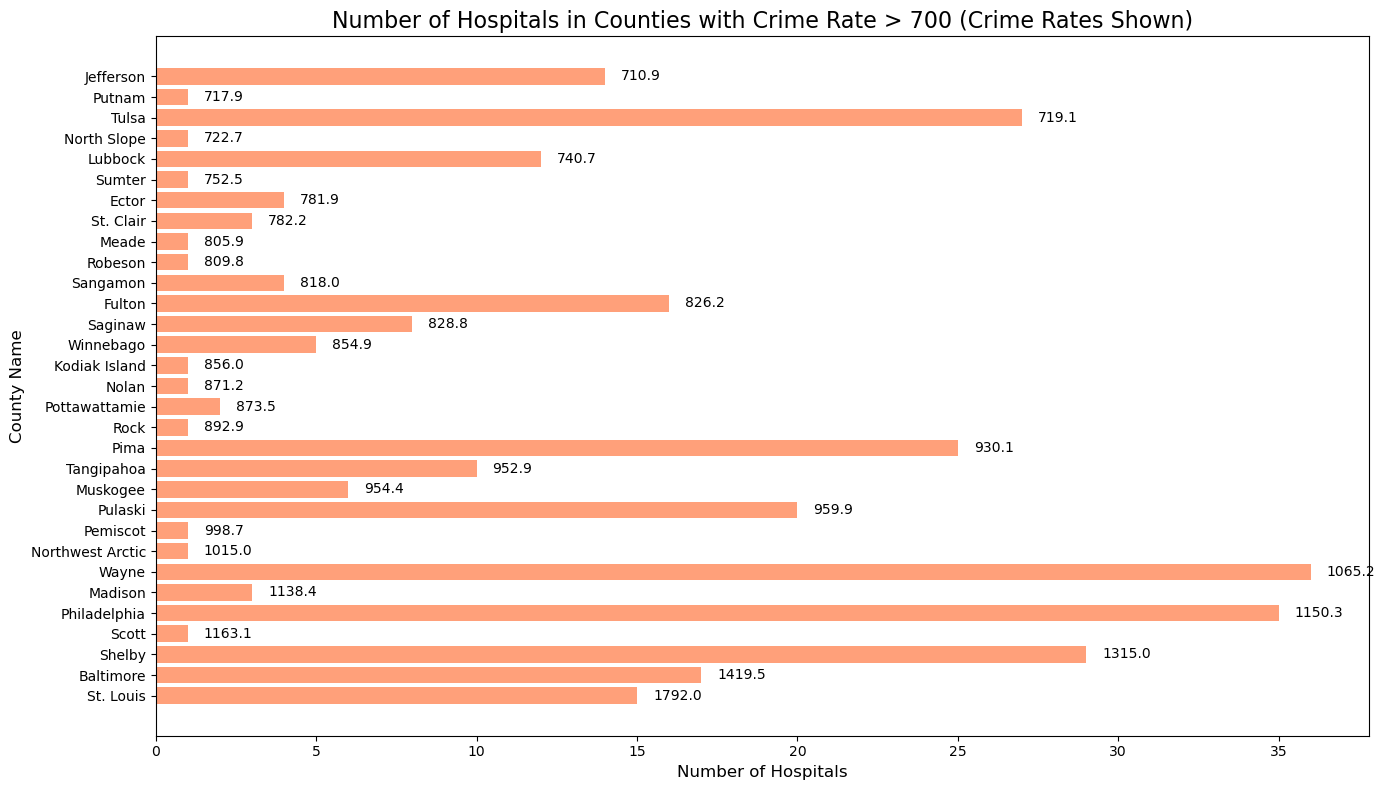

In [11]:

hospital_markdown = """
### Hospitals in High Crime Areas with Crime Rates

This visualization highlights counties with high crime rates and the availability of hospitals in those regions, alongside the corresponding crime rates.

#### Why It Matters:
- Identifies areas with high crime rates that may need more healthcare infrastructure.
- Enables better resource planning and public safety strategies by correlating hospital availability with crime rates.

#### How It’s Calculated:
- The query retrieves counties where the crime rate exceeds a specified threshold, along with the details of hospitals in those areas and their corresponding crime rates.

#### Visualization:
- **Horizontal Bar Chart**: Displays the number of hospitals available in counties with high crime rates, with annotations showing the crime rate.
"""

display(Markdown(hospital_markdown))

crime_threshold = 700  
_, hospital_df = query.get_hospital_with_percent_crime_rate(crime_threshold)

hospital_counts = (
    hospital_df.groupby(['county_name', 'crime_rate_per_100000'])
    .size()
    .reset_index(name='hospital_count')
)

hospital_counts = hospital_counts.sort_values(by='crime_rate_per_100000', ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.barh(
    hospital_counts['county_name'], 
    hospital_counts['hospital_count'], 
    color="#FFA07A"
)

for bar, crime_rate in zip(bars, hospital_counts['crime_rate_per_100000']):
    plt.text(
        bar.get_width() + 0.5, 
        bar.get_y() + bar.get_height() / 2,
        f"{crime_rate:.1f}",
        va='center'
    )

plt.title(f"Number of Hospitals in Counties with Crime Rate > {crime_threshold} (Crime Rates Shown)", fontsize=16)
plt.xlabel("Number of Hospitals", fontsize=12)
plt.ylabel("County Name", fontsize=12)
plt.tight_layout()
plt.show()



### Food Banks in High Poverty Areas

This visualization identifies counties with a high poverty percentage and the available food banks in those regions.

#### Why It Matters:
- Highlights areas that may need additional resources and food bank support.
- Enables targeted intervention in regions with higher poverty rates.

#### How It’s Calculated:
- The query retrieves counties where the poverty percentage exceeds a specified threshold, along with the details of food banks in those areas.

#### Visualization:
- **Horizontal Bar Chart**: Displays the number of food banks available in counties with high poverty percentages.


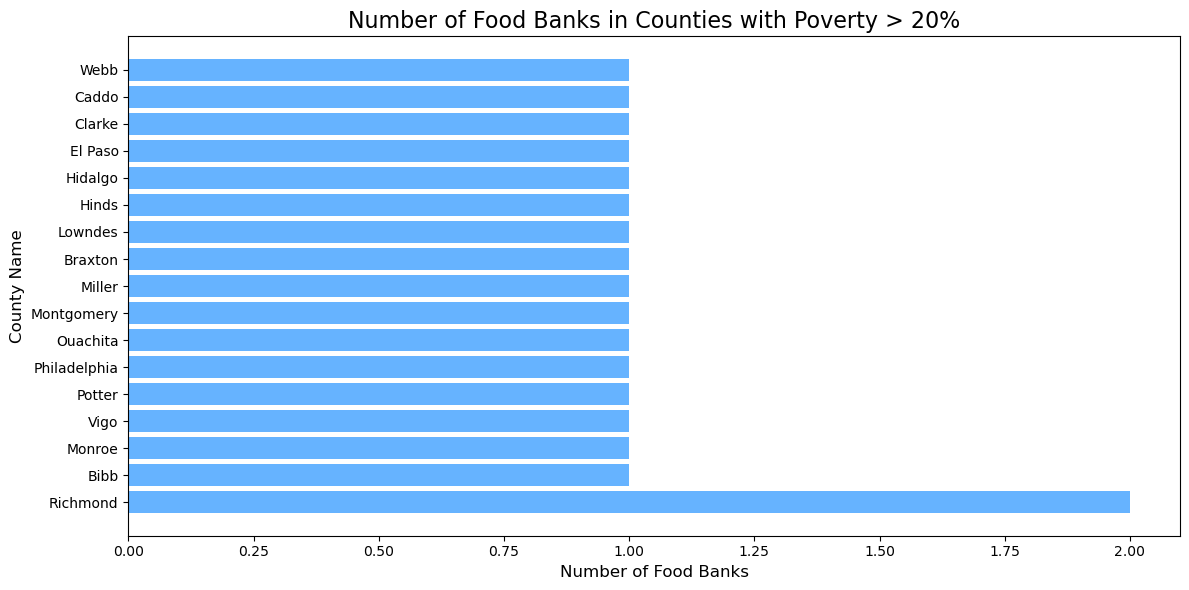

In [12]:

food_bank_markdown = """
### Food Banks in High Poverty Areas

This visualization identifies counties with a high poverty percentage and the available food banks in those regions.

#### Why It Matters:
- Highlights areas that may need additional resources and food bank support.
- Enables targeted intervention in regions with higher poverty rates.

#### How It’s Calculated:
- The query retrieves counties where the poverty percentage exceeds a specified threshold, along with the details of food banks in those areas.

#### Visualization:
- **Horizontal Bar Chart**: Displays the number of food banks available in counties with high poverty percentages.
"""

display(Markdown(food_bank_markdown))

threshold = 20  # Example threshold for poverty percentage
_, food_bank_df = query.get_food_banks_with_percent_poverty(threshold)
food_bank_counts = food_bank_df.groupby('county_name')['food_bank_name'].count().reset_index()
food_bank_counts = food_bank_counts.sort_values(by='food_bank_name', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(food_bank_counts['county_name'], food_bank_counts['food_bank_name'], color="#66B3FF")
plt.title(f"Number of Food Banks in Counties with Poverty > {threshold}%", fontsize=16)
plt.xlabel("Number of Food Banks", fontsize=12)
plt.ylabel("County Name", fontsize=12)
plt.tight_layout()
plt.show()



### **Law Enforcement Distribution by County and City in High-Crime Areas**

#### **Purpose**
This visualization organizes law enforcement counts for each type as horizontal bars grouped by counties and cities.

#### **Why It Matters**
Horizontal bars allow easier comparison of law enforcement distribution across counties and cities with high crime rates.

#### **How It’s Calculated**
Counties and cities with crime rates exceeding 700 incidents per 100,000 people were identified. Counts were aggregated for each law enforcement type.

#### **Observations**
- Grouped horizontal bars make it easier to compare distributions within and across counties.


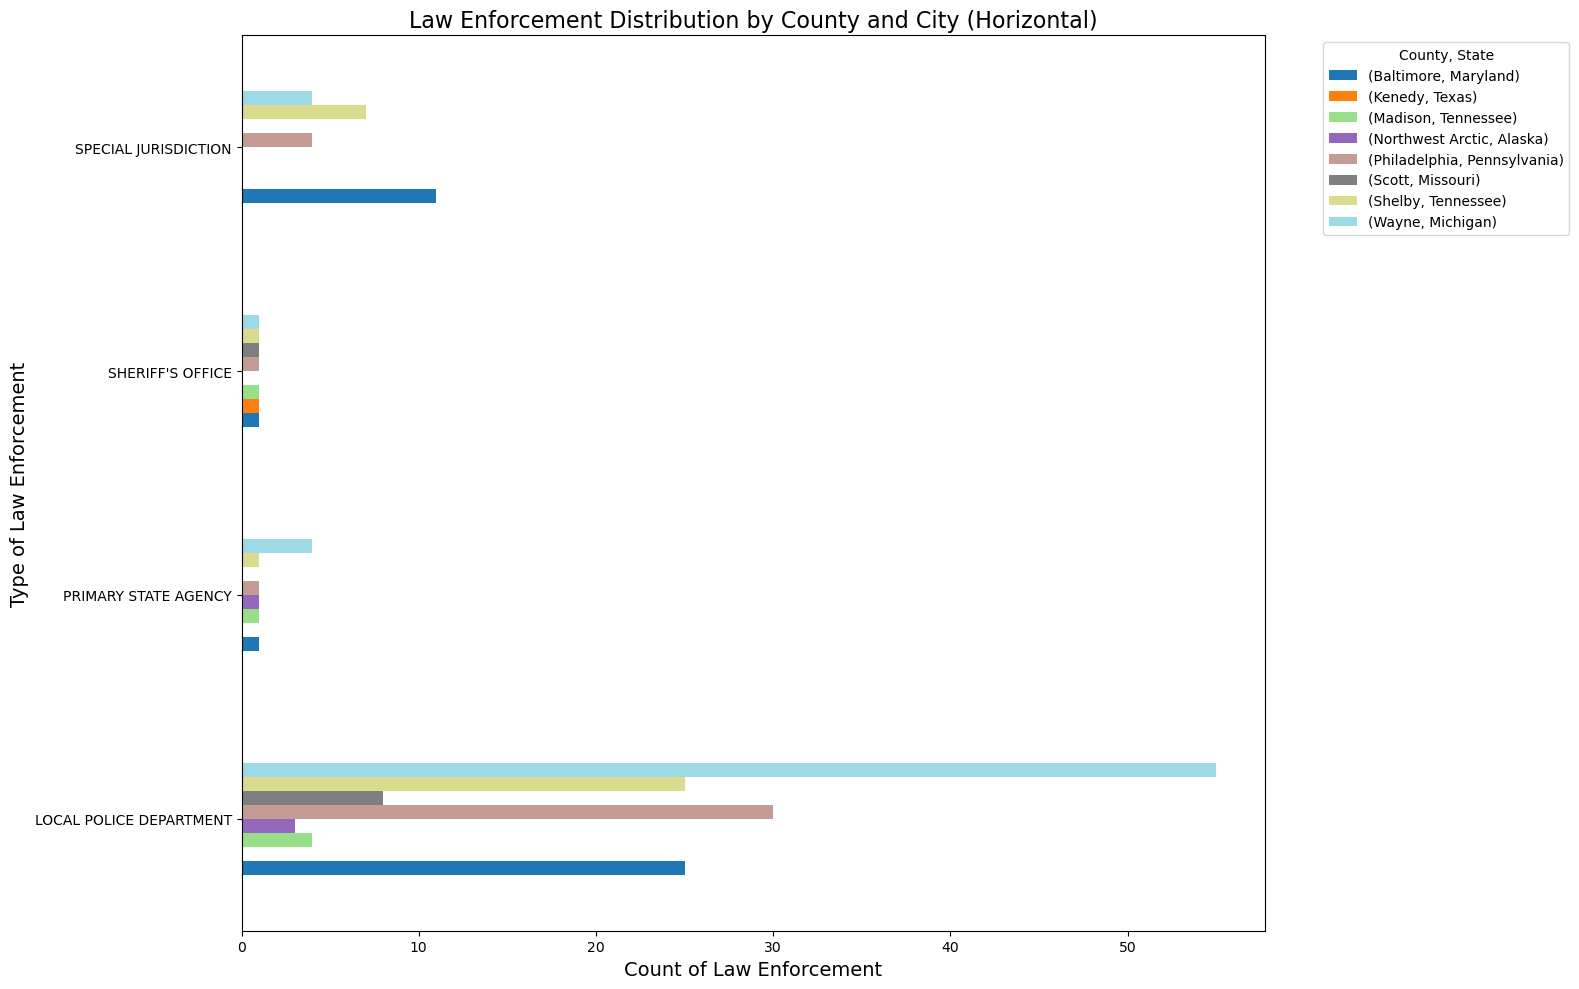

In [13]:
law_enforcement_markdown = """
### **Law Enforcement Distribution by County and City in High-Crime Areas**

#### **Purpose**
This visualization organizes law enforcement counts for each type as horizontal bars grouped by counties and cities.

#### **Why It Matters**
Horizontal bars allow easier comparison of law enforcement distribution across counties and cities with high crime rates.

#### **How It’s Calculated**
Counties and cities with crime rates exceeding 700 incidents per 100,000 people were identified. Counts were aggregated for each law enforcement type.

#### **Observations**
- Grouped horizontal bars make it easier to compare distributions within and across counties.
"""

display(Markdown(law_enforcement_markdown))

df = query.get_law_enforcement_by_county(1000)
pivot_data = df.pivot(index=["county_name", "state_name"], columns="law_enforcement_type", values="law_enforcement_count").fillna(0)

pivot_data.T.plot(kind="barh", figsize=(16, 10), stacked=False, colormap="tab20")
plt.title('Law Enforcement Distribution by County and City (Horizontal)', fontsize=16)
plt.xlabel('Count of Law Enforcement', fontsize=14)
plt.ylabel('Type of Law Enforcement', fontsize=14)
plt.legend(title="County, State", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### **Dynamic Relationship Analysis: Crime Rate vs. Poverty Percentage**

#### **Key Insights**
- **Correlation Coefficient:** 0.05
  - This indicates a weak positive relationship between poverty percentage and crime rate.
  - A p-value of 0.5931 suggests that this relationship is not statistically significant.

#### **Observations**
- The scatter plot visualizes how poverty and crime rates interact, with unemployment rate shown as a gradient.
- Counties with higher poverty levels tend to have higher crime rates.

#### **Poverty Statistics**
- **Average Poverty Percentage:** 18.36%
- **Maximum Poverty Percentage:** 35.70%
- **Minimum Poverty Percentage:** 7.40%

#### **Crime Statistics**
- **Average Crime Rate:** 701.76 crimes per 100,000
- **Maximum Crime Rate:** 1792.00 crimes per 100,000
- **Minimum Crime Rate:** 501.15 crimes per 100,000


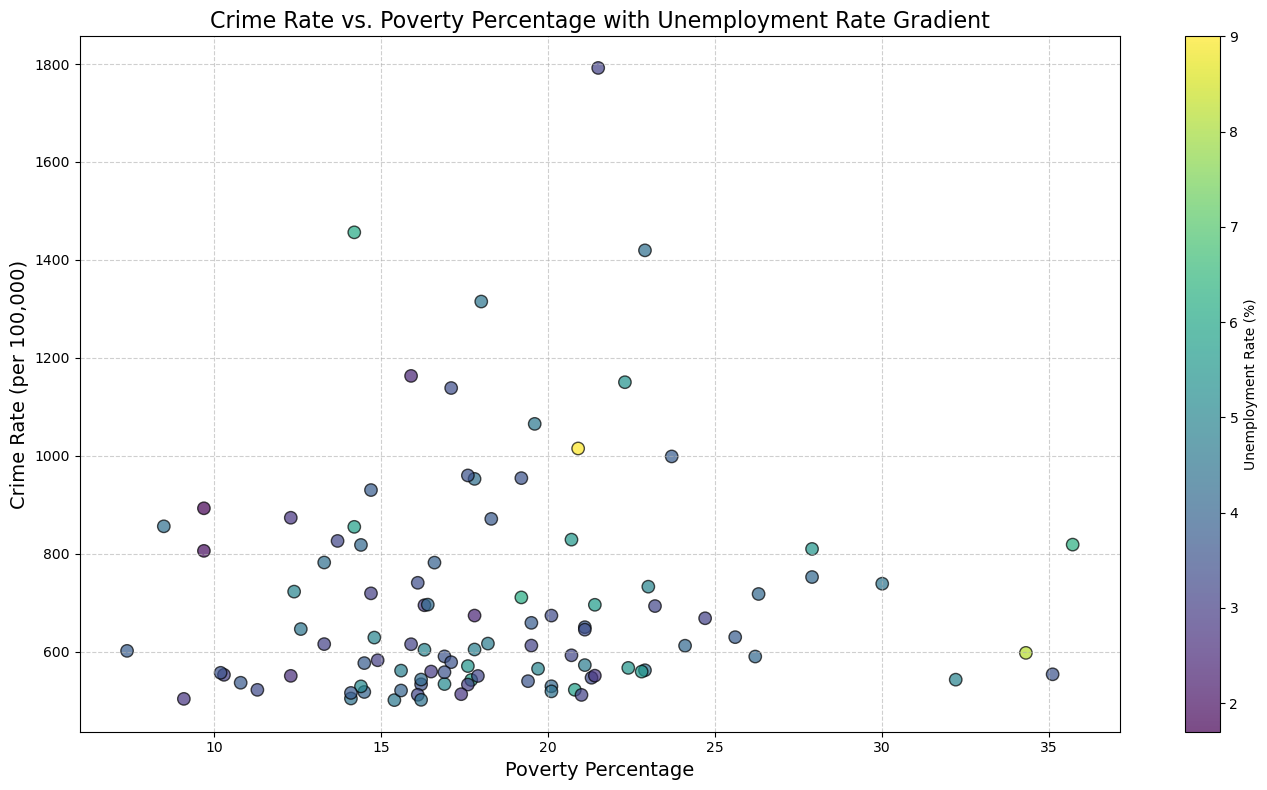

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from IPython.display import Markdown, display

table_output, df = query.get_all(edu=0, unemp=0, pov=0, crime=500)

# Compute correlation
correlation, p_value = pearsonr(df['poverty_percentage'], df['crime_rate_per_100000'])
relationship = (
    "strong positive" if correlation > 0.7 else
    "moderate positive" if correlation > 0.3 else
    "weak positive" if correlation > 0 else
    "strong negative" if correlation < -0.7 else
    "moderate negative" if correlation < -0.3 else
    "weak negative" if correlation < 0 else
    "no significant"
)

summary_markdown = f"""
### **Dynamic Relationship Analysis: Crime Rate vs. Poverty Percentage**

#### **Key Insights**
- **Correlation Coefficient:** {correlation:.2f}
  - This indicates a {relationship} relationship between poverty percentage and crime rate.
  - A p-value of {p_value:.4f} suggests that this relationship is {'statistically significant' if p_value < 0.05 else 'not statistically significant'}.

#### **Observations**
- The scatter plot visualizes how poverty and crime rates interact, with unemployment rate shown as a gradient.
- {('Counties with higher poverty levels tend to have higher crime rates.' if correlation > 0 else 'No consistent pattern between poverty and crime rates is evident.')}

#### **Poverty Statistics**
- **Average Poverty Percentage:** {df['poverty_percentage'].mean():.2f}%
- **Maximum Poverty Percentage:** {df['poverty_percentage'].max():.2f}%
- **Minimum Poverty Percentage:** {df['poverty_percentage'].min():.2f}%

#### **Crime Statistics**
- **Average Crime Rate:** {df['crime_rate_per_100000'].mean():.2f} crimes per 100,000
- **Maximum Crime Rate:** {df['crime_rate_per_100000'].max():.2f} crimes per 100,000
- **Minimum Crime Rate:** {df['crime_rate_per_100000'].min():.2f} crimes per 100,000
"""

# Display Markdown
display(Markdown(summary_markdown))

# Visualization
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    df['poverty_percentage'], 
    df['crime_rate_per_100000'], 
    s=80, 
    alpha=0.7, 
    c=df['unemployment_rate'], 
    cmap='viridis', 
    edgecolors='k'
)
plt.colorbar(scatter, label='Unemployment Rate (%)')
plt.title('Crime Rate vs. Poverty Percentage with Unemployment Rate Gradient', fontsize=16)
plt.xlabel('Poverty Percentage', fontsize=14)
plt.ylabel('Crime Rate (per 100,000)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
